# Grupowanie hierarchiczne  
## Zadania
1. Wczytaj w RStudio plik z danymi nasiona.RData (funkcja load).

In [1]:
library(tidyverse)
options(jupyter.rich_display = FALSE,
        repr.plot.width = 15,
        repr.plot.height = 8)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
load("nasiona.RData")
df <- nasiona

2. Przyglądnij się danym i wybierz zmienne do analizy.

In [3]:
glimpse(df)

Rows: 203
Columns: 7
$ powierzchnia               <dbl> 15.26, 14.88, 14.29, 13.84, 16.14, 14.38, 1…
$ obwod                      <dbl> 14.84, 14.57, 14.09, 13.94, 14.99, 14.21, 1…
$ zwiezlosc                  <dbl> 0.8710, 0.8811, 0.9050, 0.8955, 0.9034, 0.8…
$ dlugosc_ziarna             <dbl> 5.763, 5.554, 5.291, 5.324, 5.658, 5.386, 5…
$ szerokosc_ziarna           <dbl> 3.312, 3.333, 3.337, 3.379, 3.562, 3.312, 3…
$ wspolczynnik_asymetrii     <dbl> 2.2210, 1.0180, 2.6990, 2.2590, 1.3550, 2.4…
$ dlugosc_wyzlobienia_ziarna <dbl> 5.220, 4.956, 4.825, 4.805, 5.175, 4.956, 5…


In [4]:
summary(df)

  powierzchnia       obwod         zwiezlosc      dlugosc_ziarna 
 Min.   :10.59   Min.   :12.41   Min.   :0.8081   Min.   :4.899  
 1st Qu.:12.33   1st Qu.:13.46   1st Qu.:0.8571   1st Qu.:5.265  
 Median :14.38   Median :14.37   Median :0.8734   Median :5.541  
 Mean   :14.91   Mean   :14.59   Mean   :0.8709   Mean   :5.640  
 3rd Qu.:17.45   3rd Qu.:15.80   3rd Qu.:0.8871   3rd Qu.:6.002  
 Max.   :21.18   Max.   :17.25   Max.   :0.9183   Max.   :6.675  
 szerokosc_ziarna wspolczynnik_asymetrii dlugosc_wyzlobienia_ziarna
 Min.   :2.630    Min.   :0.7651         Min.   :4.519             
 1st Qu.:2.954    1st Qu.:2.5700         1st Qu.:5.045             
 Median :3.242    Median :3.6310         Median :5.228             
 Mean   :3.264    Mean   :3.7104         Mean   :5.420             
 3rd Qu.:3.564    3rd Qu.:4.7990         3rd Qu.:5.879             
 Max.   :4.033    Max.   :8.4560         Max.   :6.550             

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



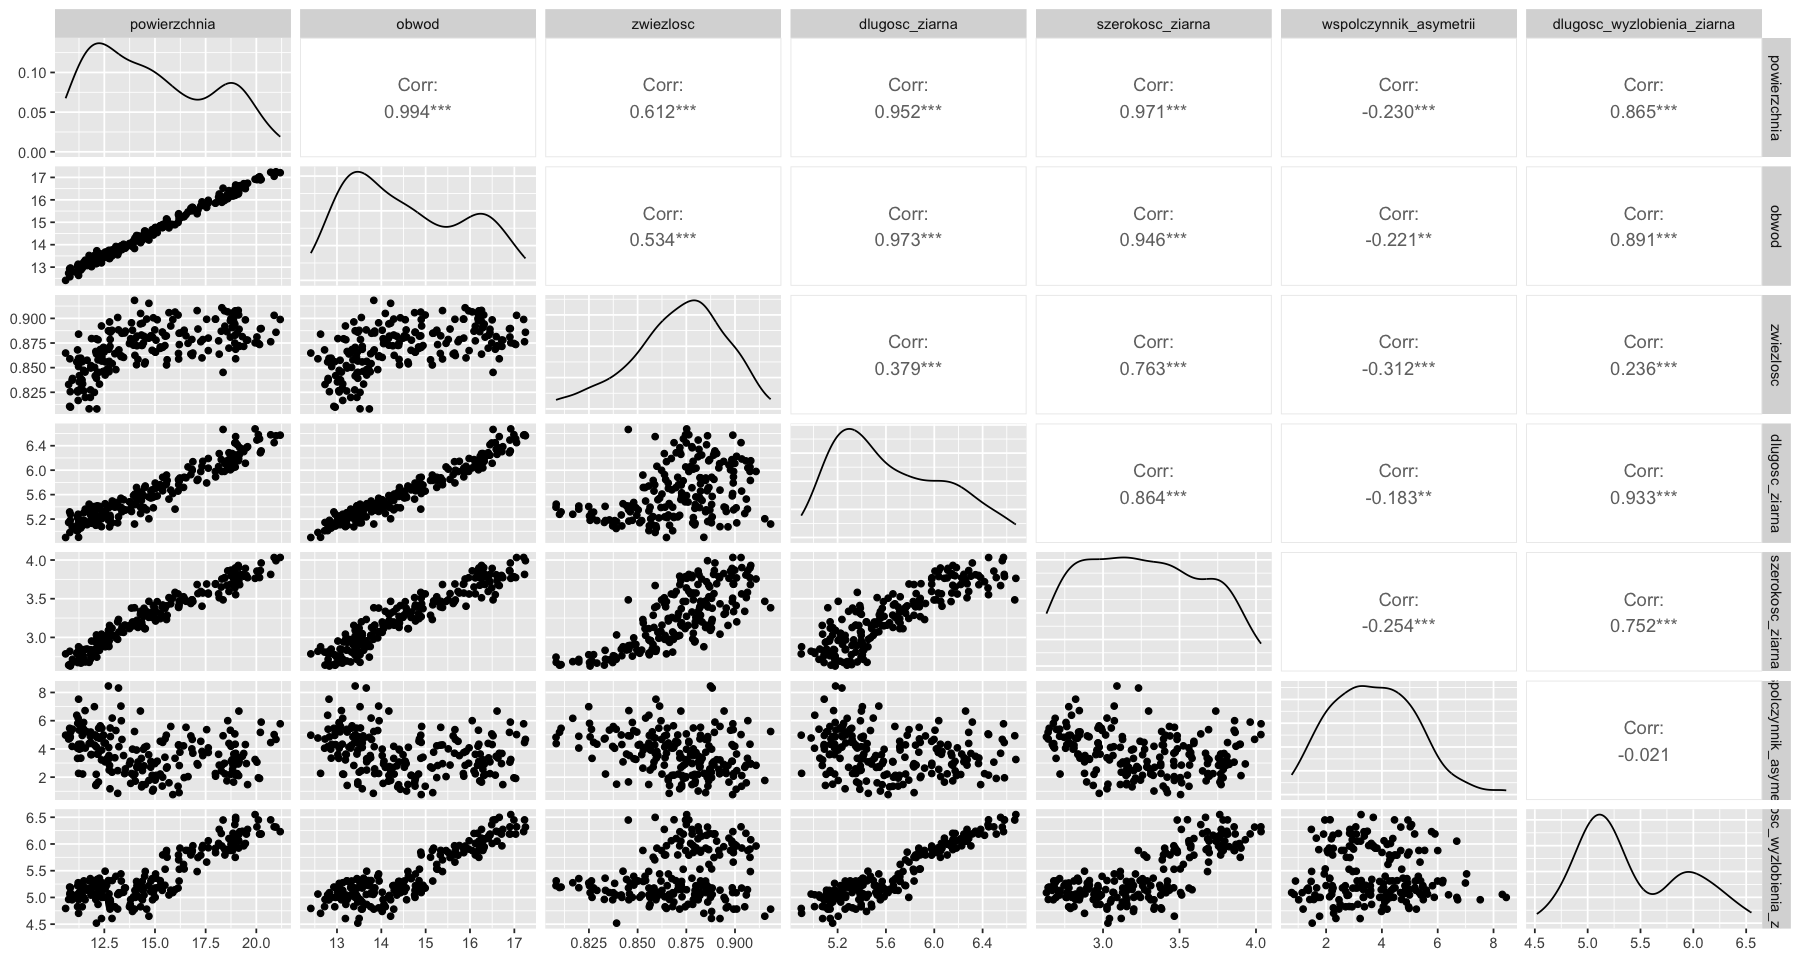

In [5]:
GGally::ggpairs(df)

*wow, ale korelacje fajne!*

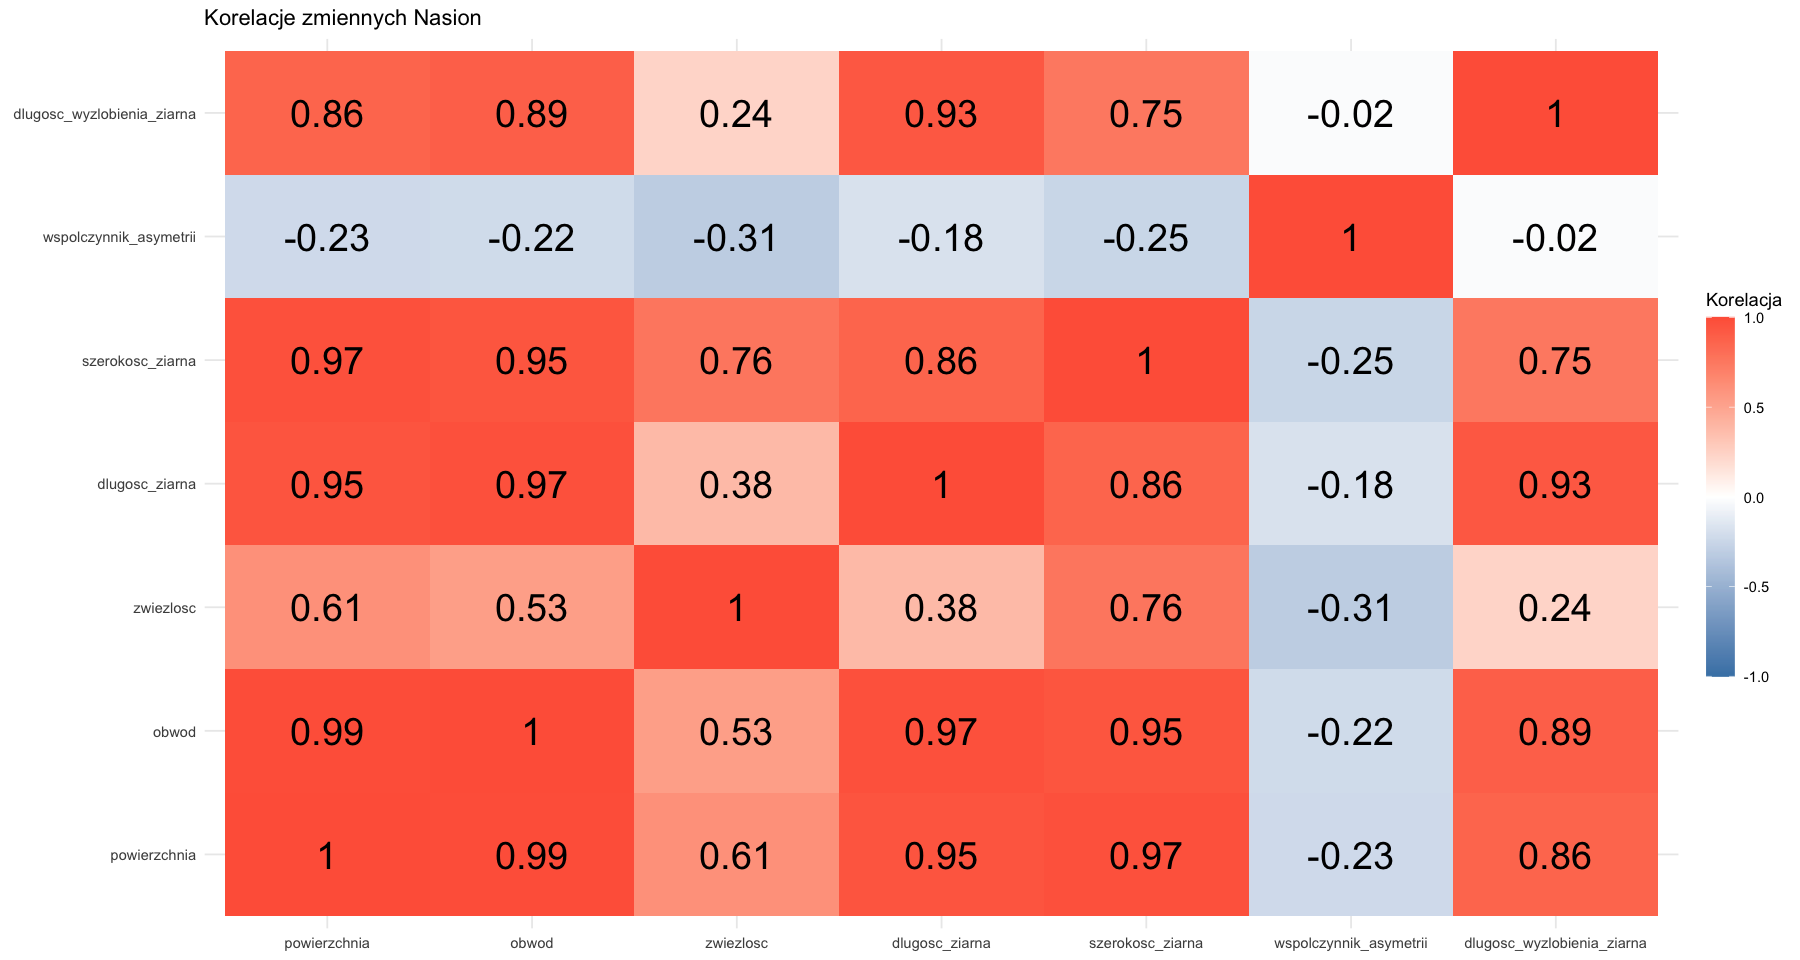

In [6]:
ggplot(reshape2::melt(cor(df), varnames=c("x", "y"), value.name="Korelacja"), aes(x = x, y = y)) +
  geom_tile(aes(fill = Korelacja)) + 
  geom_text(aes(label = round(Korelacja, 2)), size = 8, color = "black") +
  scale_fill_gradient2(low = "steelblue", mid = "white", high = "tomato", 
                       guide = guide_colorbar(ticks = FALSE, barheight = 15), 
                       limits = c(-1, 1)) + 
  theme_minimal() + 
  ggtitle("Korelacje zmiennych Nasion") +
  labs(x = NULL, y = NULL)

In [7]:
df_chosen <- df[-c(3, 6)]

*wywalam wspolczynnik asymetrii bo nie koreluje z niczym wiec potencjalnie sie nie przyda do analizy skupien*

3. Dokonaj standaryzacji zmiennych i wyświetl podsumowanie dla utworzonej ramki danych.

In [8]:
df_scaled <- scale(df_chosen)
summary(df_scaled)

  powierzchnia         obwod         dlugosc_ziarna    szerokosc_ziarna  
 Min.   :-1.4783   Min.   :-1.6633   Min.   :-1.6712   Min.   :-1.67620  
 1st Qu.:-0.8824   1st Qu.:-0.8579   1st Qu.:-0.8461   1st Qu.:-0.81868  
 Median :-0.1803   Median :-0.1670   Median :-0.2238   Median :-0.05894  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.8728   3rd Qu.: 0.9286   3rd Qu.: 0.8155   3rd Qu.: 0.79329  
 Max.   : 2.1486   Max.   : 2.0317   Max.   : 2.3327   Max.   : 2.03133  
 dlugosc_wyzlobienia_ziarna
 Min.   :-1.8280           
 1st Qu.:-0.7595           
 Median :-0.3892           
 Mean   : 0.0000           
 3rd Qu.: 0.9320           
 Max.   : 2.2938           

4. Określ miarę podobieństwa między grupowanymi obiektami.

*niech bedzie Euklidesowa bo najprostrza i nie ma duzo wymiarow wiec obliczen tez nie bedzie duzo*

In [9]:
chosen_method <- "euclidean"

5. Dokonaj grupowania hierarchicznego za pomocą funkcji hclust. Jako metodę mierzenia odległości
między skupieniami wybierz "ward.D2".

In [10]:
model <- hclust(dist(df_scaled, method = chosen_method), method = "ward.D2")
model


Call:
hclust(d = dist(df_scaled, method = chosen_method), method = "ward.D2")

Cluster method   : ward.D2 
Distance         : euclidean 
Number of objects: 203 


6. Narysuj dendrogram.

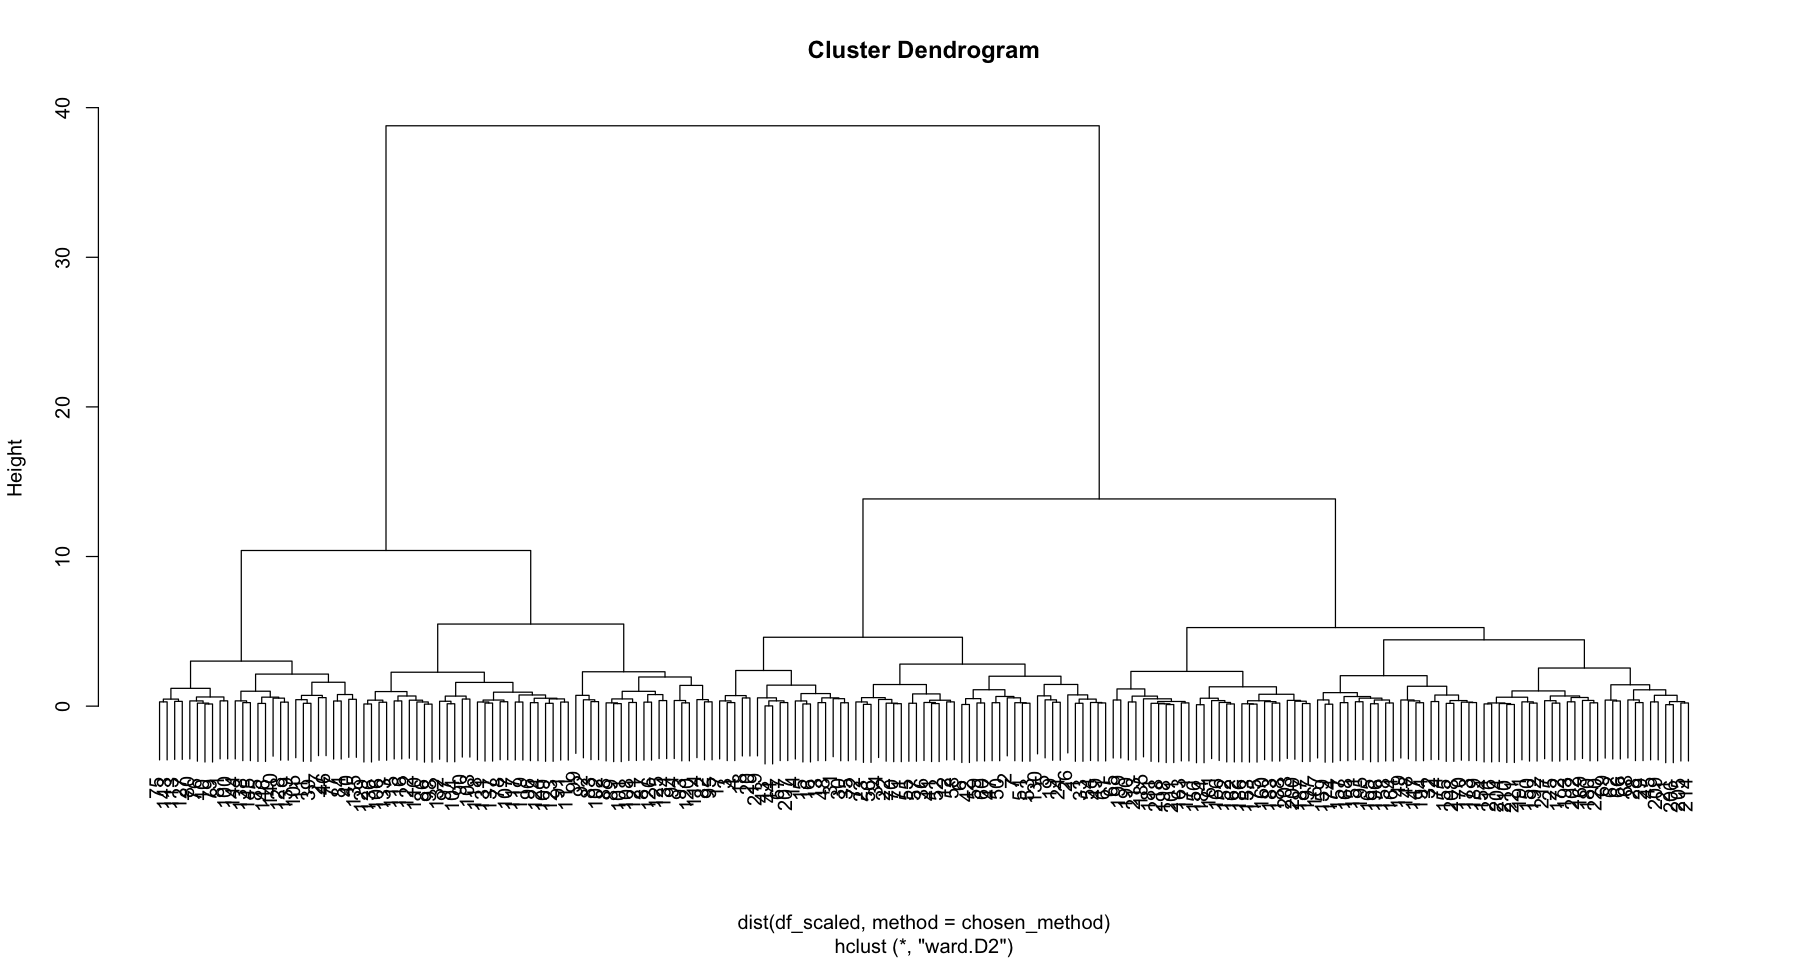

In [11]:
plot(model)

7. Ustaw przecięcie dendrogramu jako k=5, a następnie zaznacz na dendrogramie grupy.

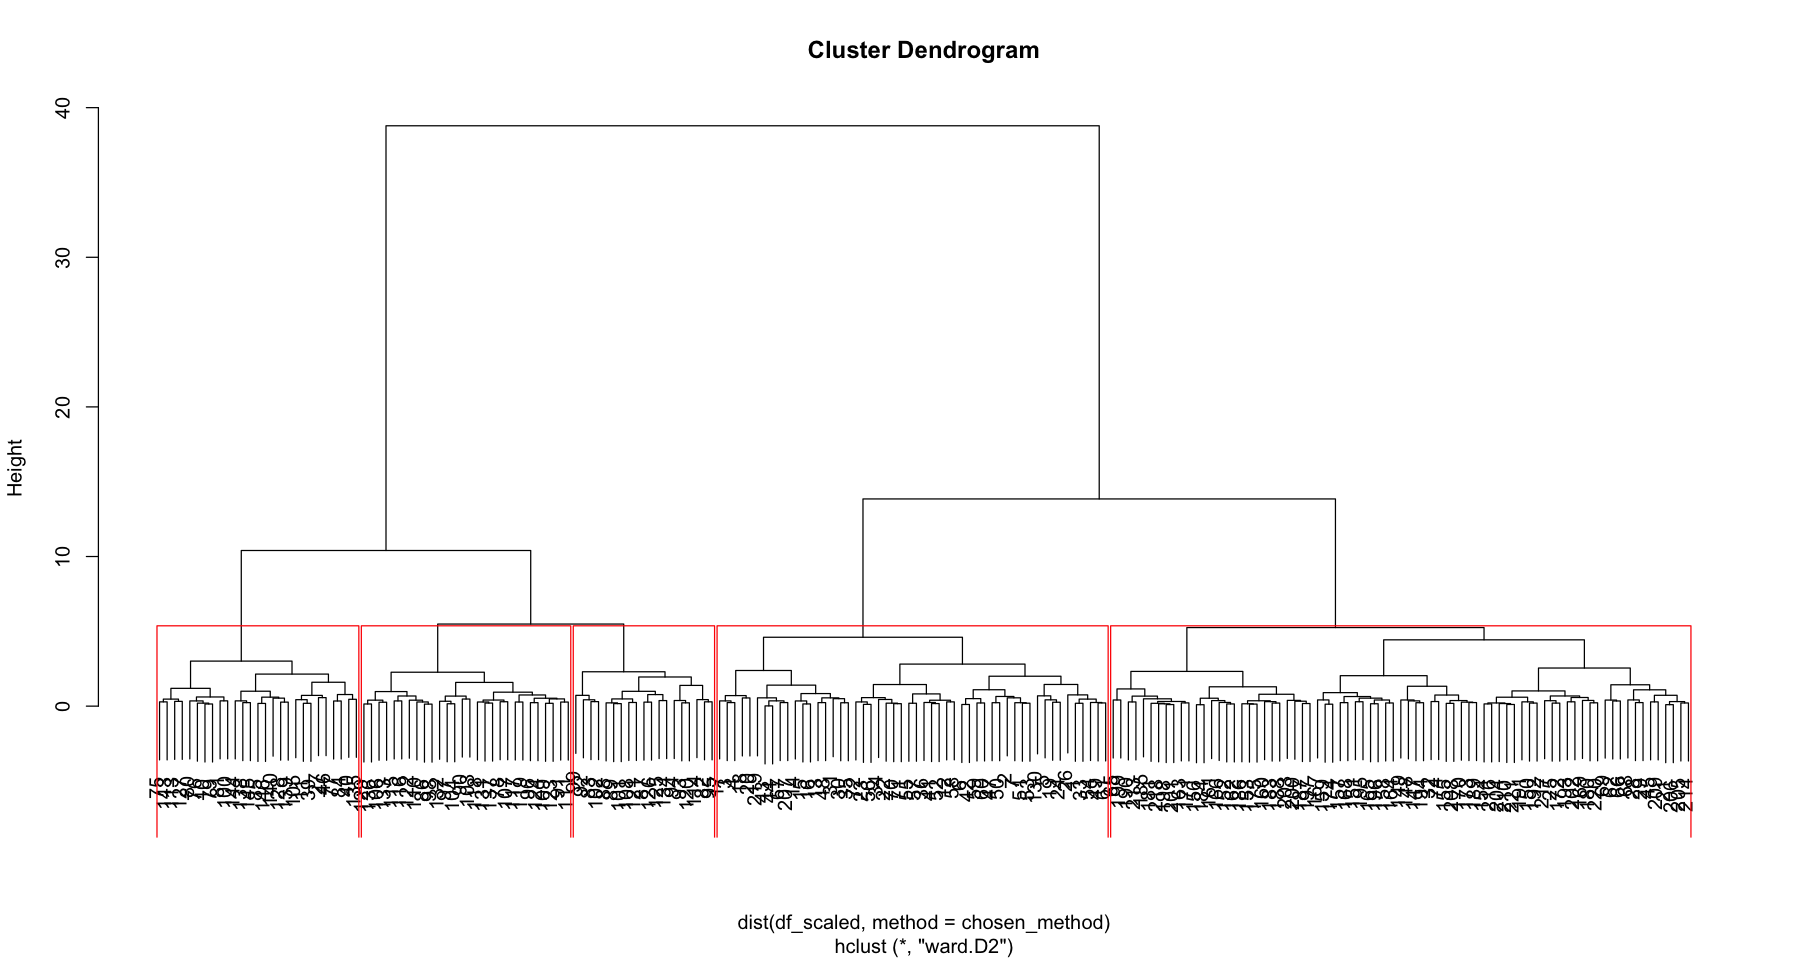

In [12]:
clusters <- cutree(model, k = 5)
plot(model)
rect.hclust(model, k = 5, border = "red")

8. Dodaj nr grupy jako nową zmienną do ramki danych

In [37]:
names(df)

[1] "powierzchnia"               "obwod"                     
[3] "zwiezlosc"                  "dlugosc_ziarna"            
[5] "szerokosc_ziarna"           "wspolczynnik_asymetrii"    
[7] "dlugosc_wyzlobienia_ziarna" "label"                     

In [13]:
df["label"] <- as.factor(clusters)

9.  Utwórz tabele z podsumowaniem wyników:  
    1.   wartości średnie atrybutów w grupach  
    2.   liczebności utworzonych grup

In [14]:
options(jupyter.rich_display = TRUE)
df %>%
    group_by(label) %>%
    summarise(across(everything(), mean), 
              count = n())

label,powierzchnia,obwod,zwiezlosc,dlugosc_ziarna,szerokosc_ziarna,wspolczynnik_asymetrii,dlugosc_wyzlobienia_ziarna,count
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,14.52519,14.38231,0.8821308,5.526615,3.276385,2.907790,5.103827,52
2,16.62815,15.44185,0.8758741,5.925222,3.472889,3.745222,5.778444,27
3,11.95636,13.27662,0.8516403,5.230753,2.869818,4.394923,5.073974,77
4,18.74321,16.23786,0.8933214,6.136929,3.769107,3.284107,6.001786,28
5,19.80526,16.82842,0.8784263,6.474316,3.789632,3.711895,6.318263,19


10.  Narysuj wykres zależności powierzchni (oś x) od obwodu (oś y), zaznaczając kolorami utworzone grupy.

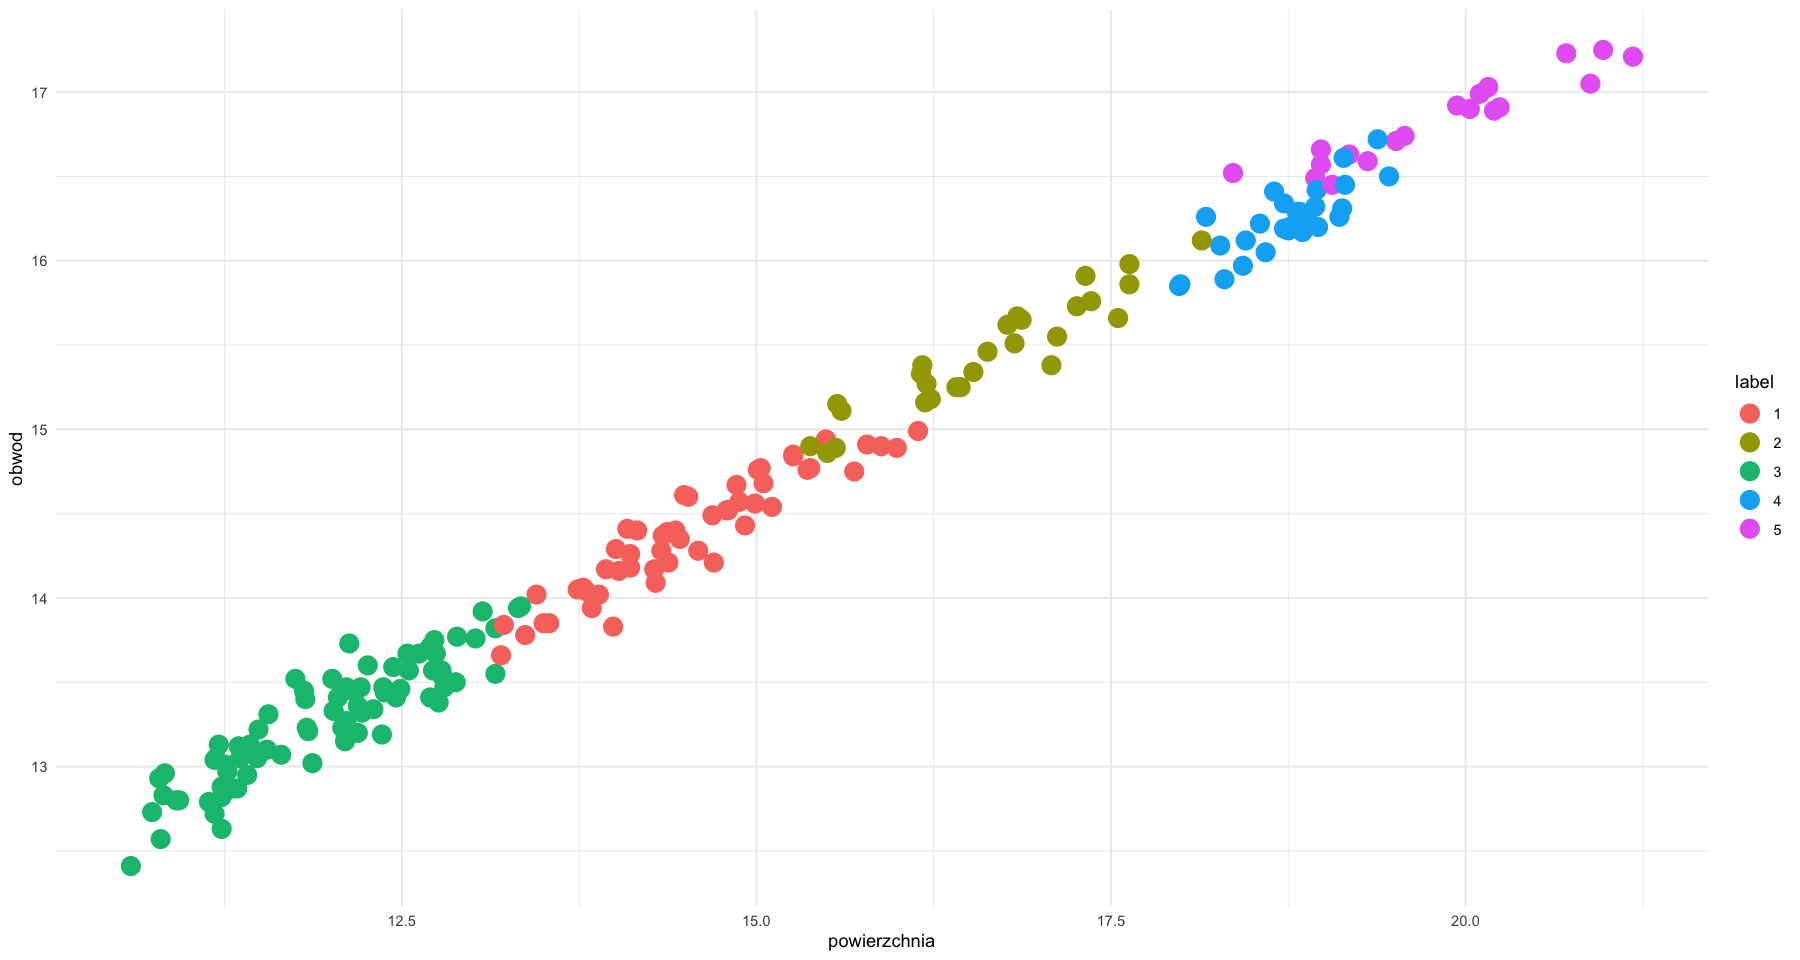

In [15]:
ggplot(df) + 
    aes(x = powierzchnia, y = obwod, color = label) +
    geom_point(size=5) + 
    theme_minimal()

*sprobuje zrobic PCA, najpierw recznie bo dane mocno skorelowane i fajnie widziec klastrowanie w 2D na wykresie*  
*z racji, ze dane sa przeskalowane, ich macierz kowariancji to po prostu macierz korelacji wiec pomine niepotrzebne kroki*

In [51]:
cor_matrix <- cor(df_scaled)

In [52]:
eigen <- eigen(cor_matrix)
eigen

eigen() decomposition
$values
[1] 4.661242340 0.283533370 0.046944547 0.007077613 0.001202130

$vectors
           [,1]       [,2]         [,3]        [,4]        [,5]
[1,] -0.4592209  0.2323523  0.006602096  0.37503965  0.77099305
[2,] -0.4613312  0.0903740 -0.235862986  0.60732783 -0.59542219
[3,] -0.4532652 -0.2568574 -0.681395783 -0.51038027  0.06153627
[4,] -0.4354825  0.6141142  0.397310685 -0.47867765 -0.21501296
[5,] -0.4256704 -0.7033725  0.567599393 -0.02962848 -0.03201330


In [53]:
df_pca <- data.frame(PC1 = df_scaled %*% eigen$vectors[, 1],
                     PC2 = df_scaled %*% eigen$vectors[, 2])

head(df_pca)

  PC1        PC2      
1 -0.1518118 0.3369530
2  0.4205136 0.8200423
3  1.0596761 1.0857597
4  1.1185028 1.1172003
5 -0.4845722 0.9480782
6  0.8217819 0.8186198

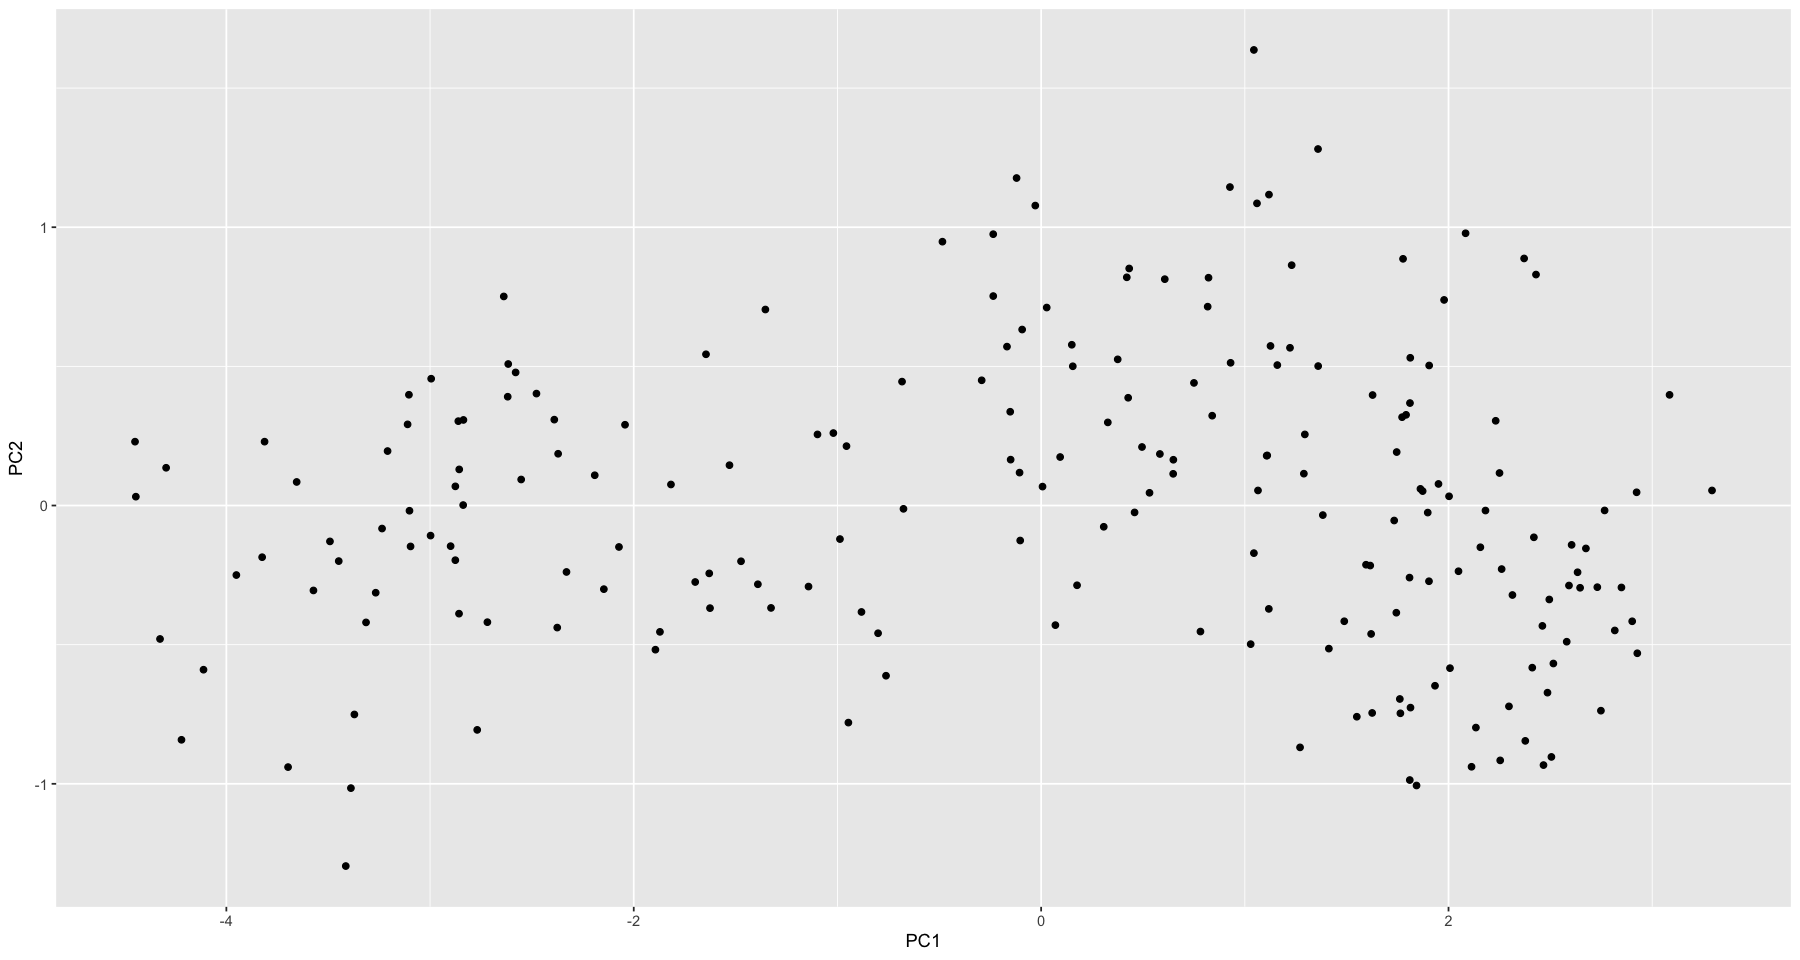

In [54]:
ggplot(df_pca) + 
    aes(x = PC1, y = PC2) +
    geom_point()

*kiepskie to PCA, troche jestem zawiedziony brakiem klastrow*  
*sprobuje gotowa funkcja*

In [55]:
df_pca2 <- prcomp(df_scaled, scale. = FALSE)

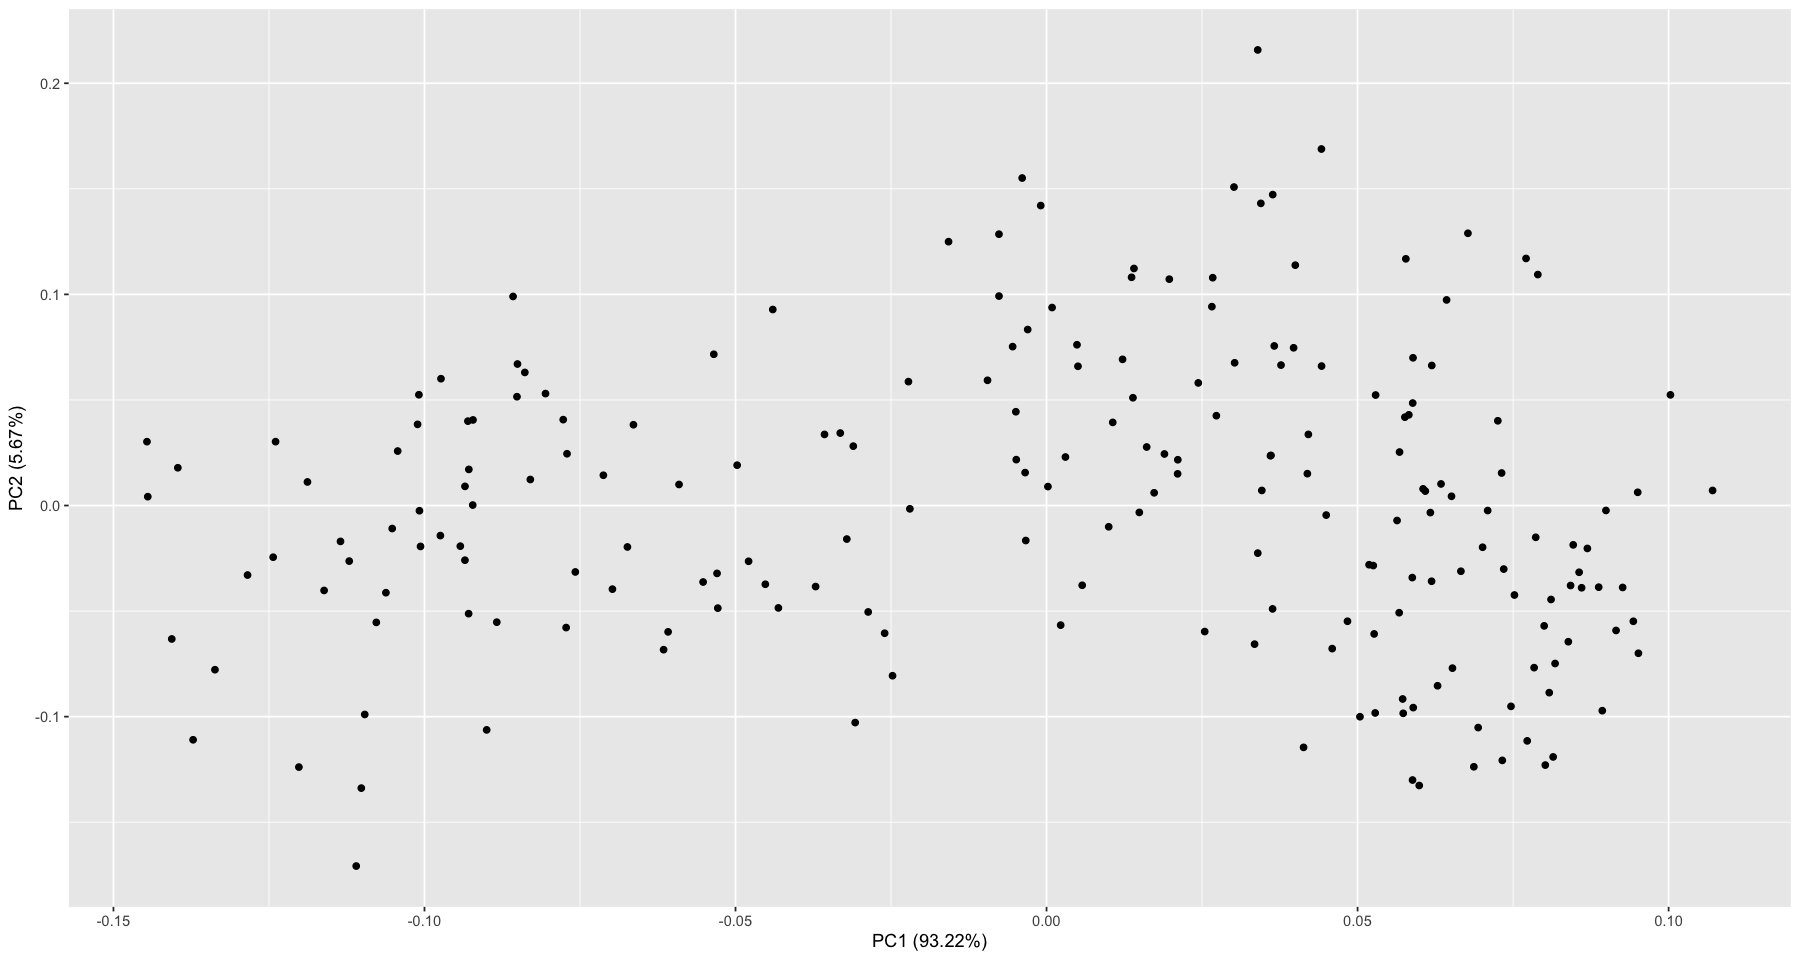

In [61]:
library(ggfortify)
autoplot(df_pca2)

*tak samo slabo, ale przynajmniej mamy dowod ze dobrze zrobilem PCA bez funkcji;)*  
*uznajmy ze sa tu k=2 klastrow*

In [46]:
model <- hclust(dist(df_pca, method = chosen_method), method = "ward.D2")
model


Call:
hclust(d = dist(df_pca, method = chosen_method), method = "ward.D2")

Cluster method   : ward.D2 
Distance         : euclidean 
Number of objects: 203 


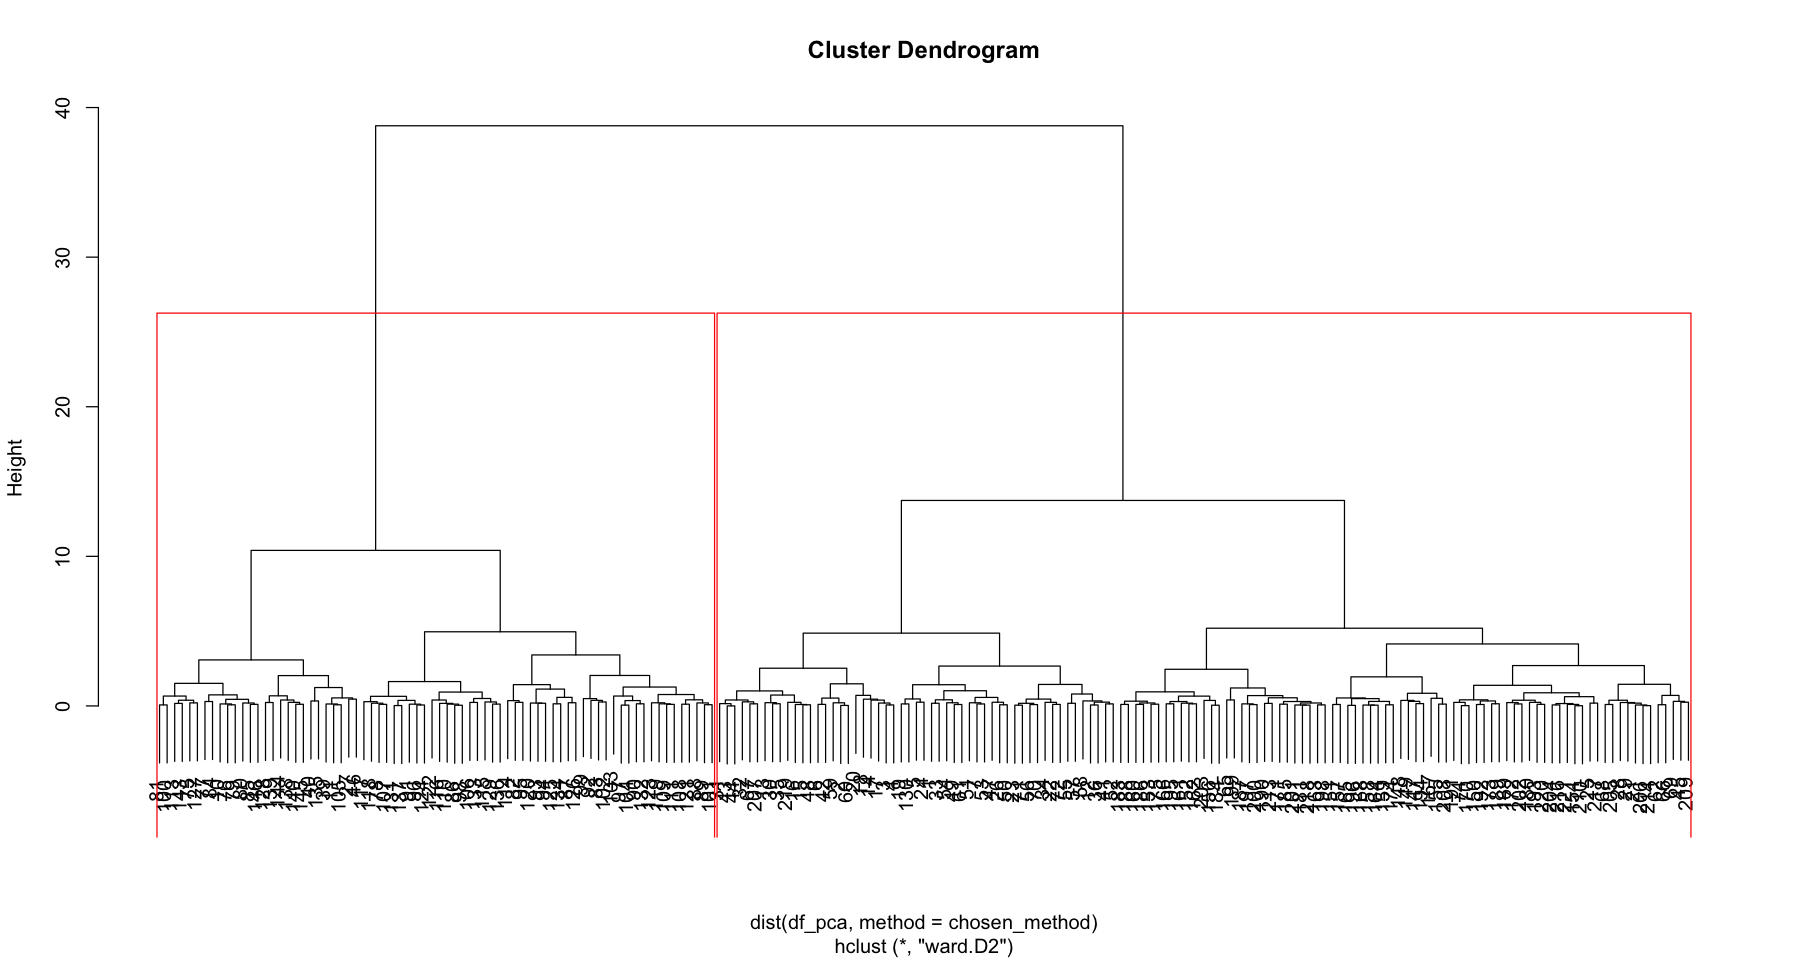

In [47]:
clusters <- cutree(model, k = 2)
plot(model)
rect.hclust(model, k = 2, border = "red")

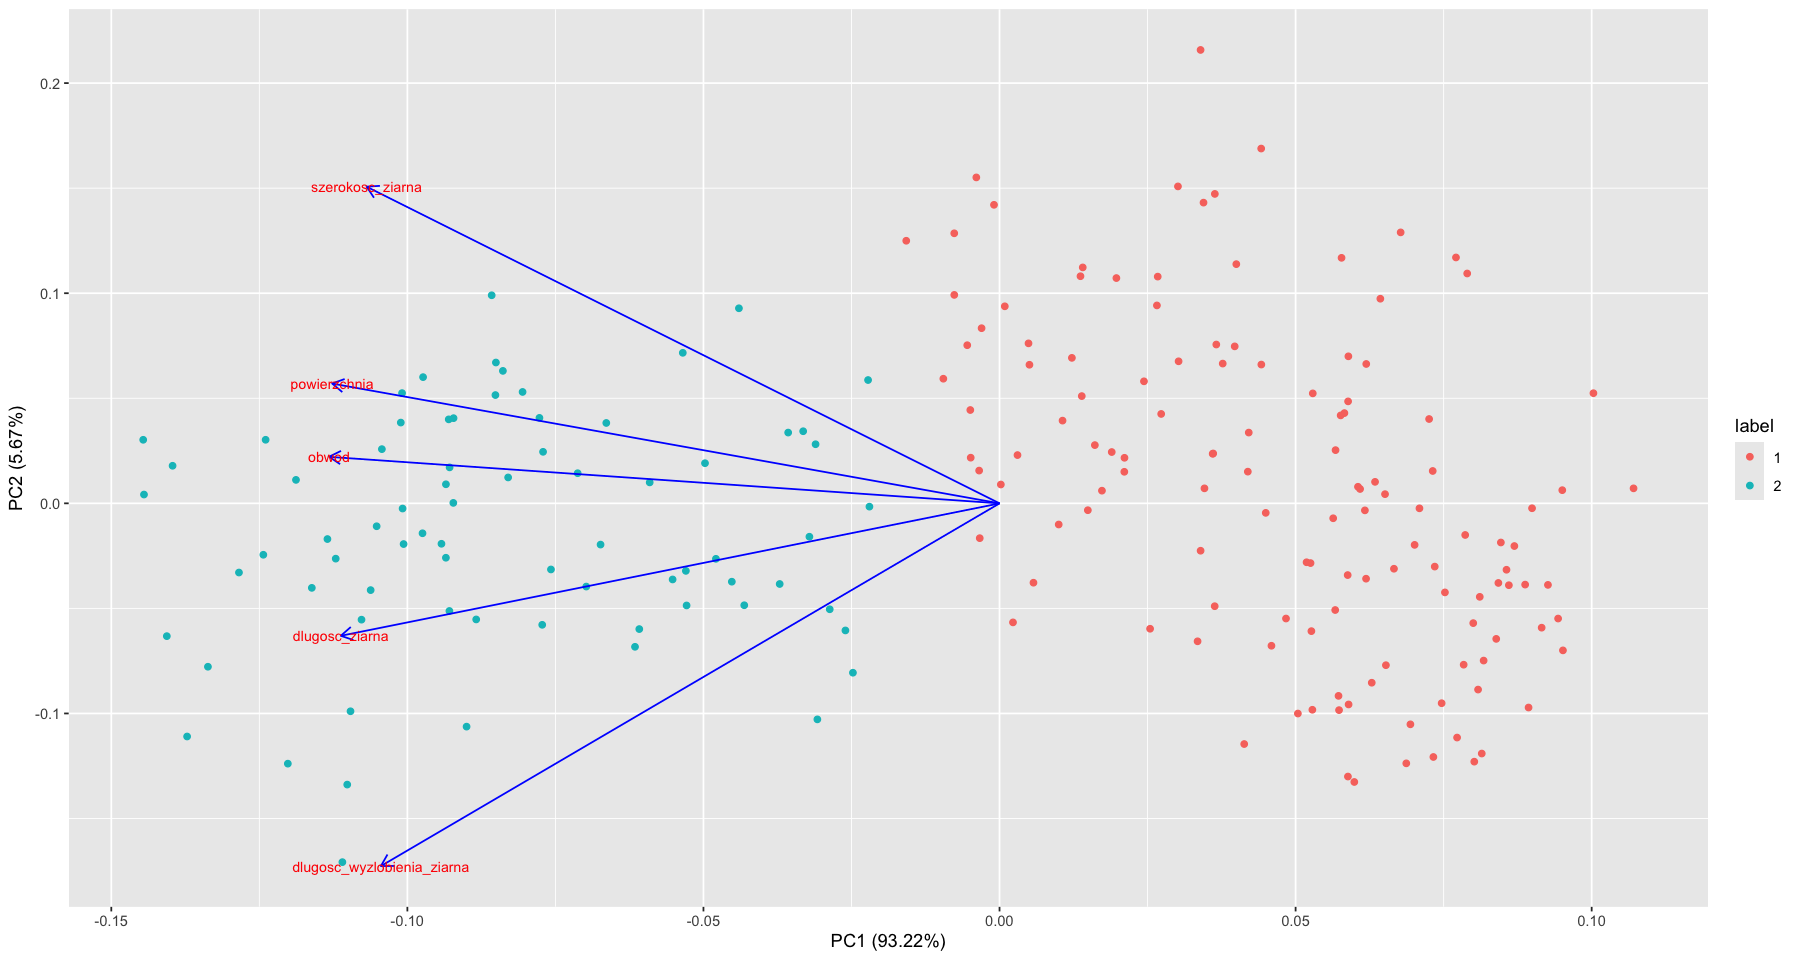

In [66]:
autoplot(df_pca2, data = df_pca, colour = 'label',
         loadings = TRUE, loadings.colour = 'blue',
         loadings.label = TRUE, loadings.label.size = 3)

*nie wiem jak zinterpretowac te wektory wlasne, dziwnie to wyglada*